In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [5]:
df.describe()

,Up Votes,Down Votes,Ratings
count,8508.000000,8508.000000,8518.000000
mean,0.391396,0.121768,4.181028
std,11.613909,3.248022,1.262200
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,0.000000,5.000000
75%,0.000000,0.000000,5.000000
max,889.000000,219.000000,5.000000


In [6]:
df_2= df[['Ratings','Review text']]

In [7]:
df_2

,Ratings,Review text
0,4,"Nice product, good quality, but price is now r..."
1,1,They didn't supplied Yonex Mavis 350. Outside ...
2,1,Worst product. Damaged shuttlecocks packed in ...
3,3,"Quite O. K. , but nowadays the quality of the..."
4,1,Over pricedJust â?¹620 ..from retailer.I didn'...
...,...,...
8513,5,NaN
8514,2,NaN
8515,4,NaN
8516,1,NaN


In [8]:
df_2.isnull().sum()

Ratings        0
Review text    8
dtype: int64

In [9]:
df_2=df_2.dropna()

In [10]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8510 entries, 0 to 8509
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ratings      8510 non-null   int64 
 1   Review text  8510 non-null   object
dtypes: int64(1), object(1)
memory usage: 199.5+ KB


In [11]:
df_2.Ratings.value_counts()

5    5079
4    1744
1     766
3     615
2     306
Name: Ratings, dtype: int64

In [12]:
abse=df_2['Ratings'].value_counts()
abse.values

array([5079, 1744,  766,  615,  306], dtype=int64)

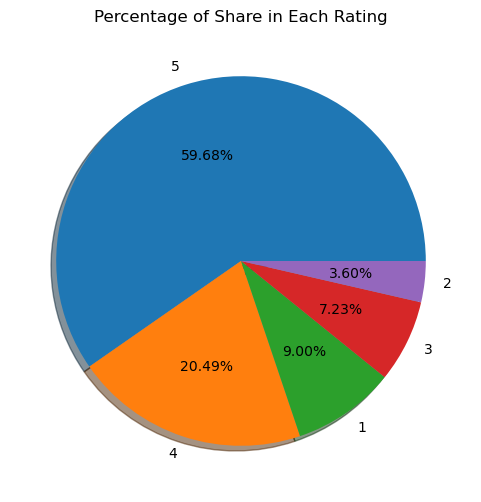

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.pie(x=abse,labels=abse.index,autopct='%1.2f%%',shadow=True)
plt.title("Percentage of Share in Each Rating")
plt.show()

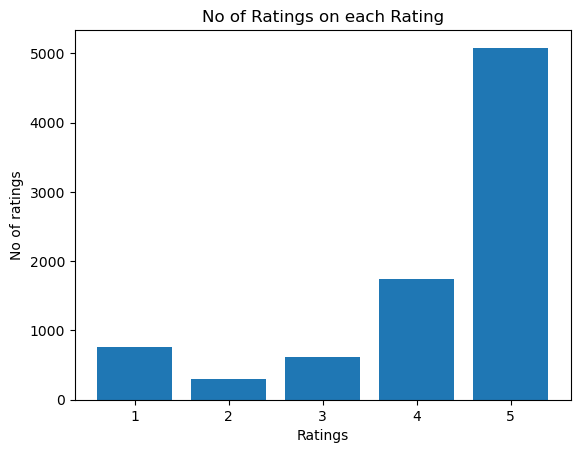

In [14]:
plt.bar(x=abse.index,height=abse.values)
plt.title("No of Ratings on each Rating")
plt.xlabel("Ratings")
plt.ylabel("No of ratings")
plt.show()

In [15]:
df_2['Ratings'] = df_2['Ratings'].apply(lambda x: 'Negative' if x <= 3 else 'Positive')

In [16]:
df_2.isnull().sum()

Ratings        0
Review text    0
dtype: int64

In [17]:
y = df_2.pop('Ratings')
X=df_2
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=45)

In [18]:
y

0       Positive
1       Negative
2       Negative
3       Negative
4       Negative
          ...   
8505    Negative
8506    Positive
8507    Positive
8508    Positive
8509    Negative
Name: Ratings, Length: 8510, dtype: object

In [19]:
import re
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [20]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()
## We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()
def preprocess(raw_text, flag):
    
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", str(raw_text))
    sentence = sentence.replace('READ MORE','')
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()
    
    # remove stop words                
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [21]:
# Now you can use `progress_apply` instead of `apply`
# and `progress_map` instead of `map`

temp_df = X_train['Review text'].progress_apply(lambda text: preprocess(text,flag = 'lemma'))

temp_df.shape

100%|█████████████████████████████████████████████████████████████████████████████| 5957/5957 [00:14<00:00, 400.39it/s]


(5957, 2)

In [22]:
# Now you can use `progress_apply` instead of `apply`
# and `progress_map` instead of `map`

temp_df_test = X_test['Review text'].progress_apply(lambda text: preprocess(text,flag = 'lemma'))

temp_df_test.shape

100%|█████████████████████████████████████████████████████████████████████████████| 2553/2553 [00:06<00:00, 409.39it/s]


(2553, 2)

In [23]:
temp_df_test.columns=['Review_text_clean','Review_text_len']

In [24]:
temp_df.columns=['Review_text_clean','Review_text_len']

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vocab=TfidfVectorizer()
X_train_tfidf = vocab.fit_transform(temp_df['Review_text_clean'])

In [26]:
X_test_tfidf = vocab.transform(temp_df_test['Review_text_clean'])

In [27]:
X_train_tfidf

<5957x2004 sparse matrix of type '<class 'numpy.float64'>'
	with 19120 stored elements in Compressed Sparse Row format>

In [28]:
X_test_tfidf

<2553x2004 sparse matrix of type '<class 'numpy.float64'>'
	with 8135 stored elements in Compressed Sparse Row format>

In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,weights='uniform',p=2,
                                metric='minkowski')

In [30]:
classifier.fit(X_train_tfidf,y_train)
y_pred = classifier.predict(X_test_tfidf)
y_pred

array(['Positive', 'Negative', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [31]:
from sklearn.metrics import classification_report,accuracy_score
a=classification_report(y_test,y_pred)

In [32]:
print(a)

              precision    recall  f1-score   support

    Negative       0.64      0.50      0.56       489
    Positive       0.89      0.93      0.91      2064

    accuracy                           0.85      2553
   macro avg       0.76      0.72      0.73      2553
weighted avg       0.84      0.85      0.84      2553



In [33]:
accuracy_score(y_test,y_pred)

0.8495887191539365

In [34]:
from sklearn.naive_bayes import MultinomialNB
Nb=MultinomialNB()
Nb.fit(X_train_tfidf,y_train)
y_pred_nb = Nb.predict(X_test_tfidf)
y_pred_nb

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [35]:
from sklearn.metrics import classification_report,accuracy_score
a=classification_report(y_test,y_pred_nb)
print(a)

              precision    recall  f1-score   support

    Negative       0.82      0.43      0.57       489
    Positive       0.88      0.98      0.93      2064

    accuracy                           0.87      2553
   macro avg       0.85      0.70      0.75      2553
weighted avg       0.87      0.87      0.86      2553



In [36]:
accuracy_score(y_test,y_pred_nb)

0.8730904817861339

In [37]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_tfidf, y_train)
y_test_pred = classifier.predict(X_test_tfidf)
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

0.8770074422248335
              precision    recall  f1-score   support

    Negative       0.77      0.52      0.62       489
    Positive       0.89      0.96      0.93      2064

    accuracy                           0.88      2553
   macro avg       0.83      0.74      0.77      2553
weighted avg       0.87      0.88      0.87      2553



## Cross Validation part

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
# Define parameter grids for each algorithm
param_grids = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5, 10]
            # Add other Decision Tree parameters
        }
    },
    'Logistic': {
        'model': LogisticRegression(),
        'param_grid': {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2']
            # Add other Logistic Regression parameters
        }
    },
    'SVM': {
        'model': SVC(),
        'param_grid': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
            # Add other SVM parameters
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'n_estimators': [100, 200, 300],
            'max_depth': [2, 5, 10],
            # Add other Random Forest parameters
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 10],
            'p': [1, 2, 3]
            # Add other KNN parameters
        }
    }
}
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
# Define a list to store results
results = []

# Perform GridSearchCV for each algorithm
for algo_name, config in tqdm(param_grids.items(), desc="Grid Search Progress"):
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['param_grid'],
        scoring='accuracy',
        cv=5,
        verbose=1
    )
    grid_search.fit(X_train_tfidf, y_train)  # Assuming X_train and y_train are your training data
    
    # Append results
    results.append({
        'algorithm': algo_name,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
    })

    print(f'Score on Test Data: {algo_name} ', grid_search.score(X_test_tfidf, y_test))

# Print results
for result in results:
    print(f"Best parameters for {result['algorithm']}: {result['best_params']}")
    print(f"Best score for {result['algorithm']}: {result['best_score']}")


Grid Search Progress:   0%|                                                                      | 0/5 [00:00<?, ?it/s]

Fitting 5 folds for each of 12 candidates, totalling 60 fits


Grid Search Progress:  20%|████████████▍                                                 | 1/5 [00:16<01:05, 16.35s/it]

Score on Test Data: DecisionTree  0.8672150411280846
Fitting 5 folds for each of 6 candidates, totalling 30 fits


Grid Search Progress:  40%|████████████████████████▊                                     | 2/5 [00:18<00:23,  7.97s/it]

Score on Test Data: Logistic  0.8758323540932237
Fitting 5 folds for each of 6 candidates, totalling 30 fits


Grid Search Progress:  60%|█████████████████████████████████████▏                        | 3/5 [01:07<00:53, 26.69s/it]

Score on Test Data: SVM  0.8789659224441834
Fitting 5 folds for each of 9 candidates, totalling 45 fits


Grid Search Progress:  80%|█████████████████████████████████████████████████▌            | 4/5 [02:51<00:57, 57.31s/it]

Score on Test Data: RandomForest  0.8159028593811203
Fitting 5 folds for each of 9 candidates, totalling 45 fits


Grid Search Progress: 100%|██████████████████████████████████████████████████████████████| 5/5 [03:10<00:00, 38.01s/it]

Score on Test Data: KNN  0.8648648648648649
Best parameters for DecisionTree: {'max_depth': 10, 'min_samples_split': 10}
Best score for DecisionTree: 0.858151178582095
Best parameters for Logistic: {'C': 10, 'penalty': 'l2'}
Best score for Logistic: 0.8751053764531525
Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}
Best score for SVM: 0.8794693422142579
Best parameters for RandomForest: {'max_depth': 10, 'n_estimators': 100}
Best score for RandomForest: 0.8044318687696876
Best parameters for KNN: {'n_neighbors': 10, 'p': 1}
Best score for KNN: 0.8623469364754675


In [88]:
DF = pd.DataFrame(results)
DF

,algorithm,best_params,best_score
0,DecisionTree,"{'max_depth': 10, 'min_samples_split': 10}",0.858151
1,Logistic,"{'C': 10, 'penalty': 'l2'}",0.875105
2,SVM,"{'C': 10, 'kernel': 'rbf'}",0.879469
3,RandomForest,"{'max_depth': 10, 'n_estimators': 100}",0.804432
4,KNN,"{'n_neighbors': 10, 'p': 1}",0.862347


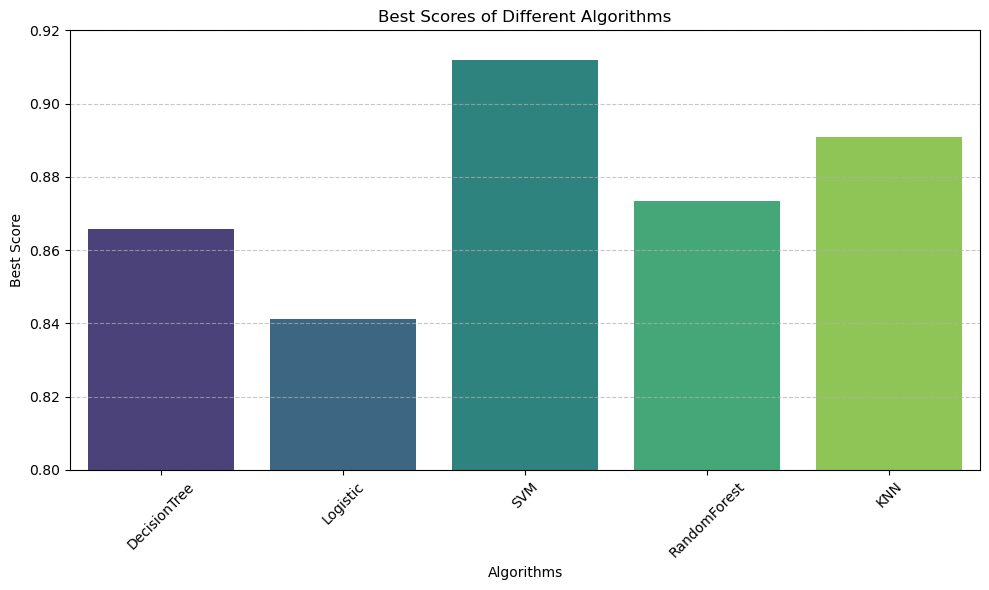

In [91]:
import seaborn as sns
algorithms = ['DecisionTree', 'Logistic', 'SVM', 'RandomForest', 'KNN']
best_scores = [0.865630, 0.841083, 0.911819, 0.873382, 0.890825]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=algorithms, y=best_scores, palette='viridis')
plt.xlabel('Algorithms')
plt.ylabel('Best Score')
plt.title('Best Scores of Different Algorithms')
plt.ylim(0.8, 0.92)  # Adjust the y-axis limits if necessary
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Pipe line

In [182]:
import numpy as np
import pandas as pd
df = pd.read_csv('data.csv')
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [183]:
df_2 = df[['Ratings','Review text']]

In [184]:
df_2

,Ratings,Review text
0,4,"Nice product, good quality, but price is now r..."
1,1,They didn't supplied Yonex Mavis 350. Outside ...
2,1,Worst product. Damaged shuttlecocks packed in ...
3,3,"Quite O. K. , but nowadays the quality of the..."
4,1,Over pricedJust â?¹620 ..from retailer.I didn'...
...,...,...
8513,5,NaN
8514,2,NaN
8515,4,NaN
8516,1,NaN


In [185]:
df_2 = df_2.dropna()
df_2.isnull().sum()

Ratings        0
Review text    0
dtype: int64

In [186]:
df_2['Ratings'] = df_2['Ratings'].apply(lambda x: 'Negative' if x <= 3 else 'Positive')

In [187]:
# Step 3: Data Preprocessing on train data (X_train)

import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()


In [41]:
def clean(doc): # doc is a string of text
    doc = doc.replace("READ MORE", "")
    
    # Remove punctuation and numbers.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

    # Converting to lower case
    doc = doc.lower()
    
    # Tokenization
    tokens = nltk.word_tokenize(doc)

    # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]
    
    # Join and return
    return " ".join(filtered_tokens)

In [189]:
y = df_2.pop('Ratings')
X=df_2
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=45)
X_train.shape,y_test.shape

((5957, 1), (2553,))

In [190]:
# Improving the efficiency by applying cleaning the text data before hand

%time X_train_clean = X_train['Review text'].progress_apply(lambda text: clean(text))

X_train_clean.shape

100%|████████████████████████████████████████████████████████████████████████████| 5957/5957 [00:05<00:00, 1041.11it/s]

CPU times: total: 5.53 s
Wall time: 5.73 s


(5957,)

In [191]:
X_train_clean

1496                                         good quality
4568                                         nice product
6209                 good pin hole observed whole shuttle
675             bad nylon shuttleonly one match life span
39      one better shuttle marketgood quality reasonab...
                              ...                        
3704                                         satisfaction
163                                           waste money
6012                                         quality good
6558    good one received original product thanks flip...
7115                               gd product value money
Name: Review text, Length: 5957, dtype: object

In [192]:
%time X_test_clean = X_test['Review text'].progress_apply(lambda text: clean(text))

X_test_clean.shape

100%|████████████████████████████████████████████████████████████████████████████| 2553/2553 [00:02<00:00, 1012.43it/s]

CPU times: total: 2.39 s
Wall time: 2.53 s


(2553,)

In [193]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,f1_score

# Assuming X_train and y_train are your training data
# Assuming X_test and y_test are your test data

# Define pipelines with the best parameters
pipelines = {
    'DecisionTree': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', DecisionTreeClassifier(max_depth=10, min_samples_split=2))
    ]),
    'Logistic': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', LogisticRegression(C=1, penalty='l2'))
    ]),
    'SVM': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', SVC(C=1, kernel='rbf'))
    ]),
    # Add pipelines for other algorithms with their best parameters
}

# Fit the pipelines with training data
for algo_name, pipeline in pipelines.items():
    pipeline.fit(X_train_clean, y_train)

# Evaluate model on test data
for algo_name, pipeline in pipelines.items():
    y_pred = pipeline.predict(X_test_clean)
    accuracy = f1_score(y_test, y_pred,average='micro')
    print(f"Accuracy for {algo_name}: {accuracy}")


Accuracy for DecisionTree: 0.8632980806893851
Accuracy for Logistic: 0.8777908343125734
Accuracy for SVM: 0.8840579710144928


In [194]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import joblib
from joblib import Memory

# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

# Define pipelines for each algorithm
pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=1
                              )
    
    %time grid_search.fit(X_train_clean, y_train)
    
    best_models[algo] = grid_search.best_estimator_
    
    print('Score on Test Data: ', grid_search.score(X_test_clean, y_test))


********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 19 s
Wall time: 20.8 s
Score on Test Data:  0.881316098707403
********** decision_tree **********
Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: total: 23.7 s
Wall time: 26.6 s
Score on Test Data:  0.8589894242068156
********** logistic_regression **********
Fitting 5 folds for each of 36 candidates, totalling 180 fits
CPU times: total: 6min 33s
Wall time: 7min 4s
Score on Test Data:  0.8511555033294164


In [195]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=2000)),
                ('classifier', DecisionTreeClassifier(max_depth=10))])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier',
                 LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.4,
                                    penalty='elasticnet', solver='saga'))])



In [213]:
from sklearn import metrics
import os
for name, model in best_models.items():
    print("*"*10, name, "*"*10)
    
    joblib.dump(model, f'C:/Users/Hello/INTERNSHIP/Flask/Flask_4/{name}.pkl')
    model = joblib.load(f'C:/Users/Hello/INTERNSHIP/Flask/Flask_4/{name}.pkl')
    
    %time y_test_pred = model.predict(X_test_clean)
    print("Test Score (F1)", metrics.f1_score(y_test, y_test_pred,average='weighted'))
    print("Test Score (accuracy)", metrics.accuracy_score(y_test, y_test_pred))
    
    print("Model Size:", os.path.getsize(f'C:/Users/Hello/INTERNSHIP/Flask/Flask_4/{name}.pkl'), "Bytes")

********** naive_bayes **********
CPU times: total: 31.2 ms
Wall time: 25.1 ms
Test Score (F1) 0.8751450593031413
Test Score (accuracy) 0.881316098707403
Model Size: 78054 Bytes
********** decision_tree **********
CPU times: total: 31.2 ms
Wall time: 23.8 ms
Test Score (F1) 0.8403774049992757
Test Score (accuracy) 0.8589894242068156
Model Size: 77544 Bytes
********** logistic_regression **********
CPU times: total: 31.2 ms
Wall time: 18.4 ms
Test Score (F1) 0.8542614371051503
Test Score (accuracy) 0.8511555033294164
Model Size: 78697 Bytes


In [45]:
import joblib
import string
model = joblib.load('C:/Users/Hello/INTERNSHIP/Flask/Flask_4/pkl_files/logistic_regression.pkl')

# The following article was fetched from:
# https://www.cnbc.com/2024/03/01/euro-zone-inflation-q1-2024.html
# https://www.nbcnews.com/news/aliens-miami-mall-police-response-viral-speculation-rcna132524
new_data = [
    "Good to "
]

new_data_clean = [clean(doc) for doc in new_data]

prediction = model.predict(new_data_clean)

print("Prediction:", prediction)

Prediction: ['Positive']
